# This notebook is used to evaluate trained model a

## Example: Raleigh

We now use Raleigh, which is the first as well as trained scenario for testing. Trained models should be evaluated in more scenario in the future

In [1]:
# we need to check if we are using the same conda env as training, which is modelA_sb3

import sys, os
from pathlib import Path
print("sys.executable =", sys.executable)
print("python version =", sys.version)
print("cwd =", os.getcwd())

# Project root
PROJECT_ROOT = Path("/home/jhuang52/Projects/metaRL_merged")

# Ensure we can import project modules
sys.path.insert(0, str(PROJECT_ROOT))

sys.executable = /home/jhuang52/miniconda3/envs/modelA_sb3/bin/python
python version = 3.11.14 (main, Oct 21 2025, 18:31:21) [GCC 11.2.0]
cwd = /data/jhuang52/Projects/metaRL_merged/eval_tools/model_a


In [2]:
from pathlib import Path
import sys

PROJECT_ROOT = Path("/home/jhuang52/Projects/metaRL_merged").resolve()
sys.path.insert(0, str(PROJECT_ROOT))

from eval_tools.model_a.model_a_functions import (
    generate_gu_trajectory_csv,
    make_gu_trajectory_gif_2d,
    evaluate_over_trajectory_csv,
    save_eval_csv,
    visualize_scene_2d,
    visualize_scene_3d,
    load_gu_trajectory_csv,
)

CFG_PATH = PROJECT_ROOT / "inner_loop/model_a/configs/raleigh_modelA.json"
MODEL_ZIP = PROJECT_ROOT / "inner_loop/model_a/runs/modelA_sb3/SAC_20260128_171021/sac_final.zip"
gu_traj_csv = PROJECT_ROOT / "eval_tools/gu_trajectories/gus_traj_raleigh_T50.csv"

# CFG_PATH = PROJECT_ROOT / "inner_loop/model_a/configs/atlanta_modelA.json"
# MODEL_ZIP = PROJECT_ROOT / "inner_loop/model_a/runs/modelA_sb3/SAC_20260206_002838/sac_final.zip"
# gu_traj_csv = PROJECT_ROOT / "eval_tools/gu_trajectories/gus_traj_atlanta_T50.csv"

In [3]:
df, cache = evaluate_over_trajectory_csv(
    cfg_path=CFG_PATH,
    model_zip_path=MODEL_ZIP,
    gu_traj_csv=gu_traj_csv,
    t_start=0,
    t_end=50,
    deterministic=True,
    action_mode="absolute",        # 如果你训练的是 delta，就改成 "delta"
    max_uav_step_dist=None,        # 想限制每步最大移动距离就填数字，比如 50.0
    smoothing_alpha=0.0,           # 想加惯性就 0.1~0.3
    save_cache=True,
)

df.head()


2026-02-11 16:19:10.013867: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-11 16:19:10.250435: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/jhuang52/miniconda3/envs/modelA_sb3/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  wa

,t,invalid_uav_count,coverage_tau_db,coverage_count,coverage_ratio,best_sinr_mean,best_sinr_min,best_sinr_max,load_var,per_uav_load,...,uav1_z,uav2_x,uav2_y,uav2_z,uav3_x,uav3_y,uav3_z,uav4_x,uav4_y,uav4_z
0,0,0,5.0,58,0.386667,-41.211571,-120.000008,82.656418,825.959167,"[91.0, 7.0, 10.0, 15.0, 17.0]",...,141.647247,16.963989,-576.113953,144.676056,579.851685,-130.343567,102.550507,426.374634,426.414062,150.130676
1,1,0,5.0,64,0.426667,-35.355370,-120.000008,83.285934,757.102051,"[88.0, 8.0, 10.0, 16.0, 17.0]",...,141.647247,16.963989,-576.113953,144.676056,579.851685,-130.343567,102.550507,426.374634,426.414062,150.130676
2,2,0,5.0,74,0.493333,-27.712109,-120.000008,82.637741,567.387695,"[78.0, 6.0, 17.0, 14.0, 22.0]",...,141.647247,16.963989,-576.113953,144.676056,579.851685,-130.343567,102.550507,426.374634,426.414062,150.130676
3,3,0,5.0,65,0.433333,-35.342800,-120.000008,82.637741,711.959106,"[86.0, 11.0, 14.0, 12.0, 17.0]",...,141.647247,16.963989,-576.113953,144.676056,579.851685,-130.343567,102.550507,426.374634,426.414062,150.130676
4,4,0,5.0,67,0.446667,-33.324406,-120.000008,82.637741,766.816284,"[88.0, 4.0, 16.0, 13.0, 18.0]",...,141.647247,16.963989,-576.113953,144.676056,579.851685,-130.343567,102.550507,426.374634,426.414062,150.130676


In [4]:
# eval_csv_path = PROJECT_ROOT / "eval_tools/model_a_eval/eval_rollout_raleigh_T50.csv"
eval_csv_path = PROJECT_ROOT / "eval_tools/model_a_eval/eval_rollout_atlanta_T50.csv"

# saved = save_eval_csv(df, eval_csv_path)
# print("Saved eval CSV:", saved)


[visualize_scene_2d] cfg_path: /data/jhuang52/Projects/metaRL_merged/inner_loop/model_a/configs/raleigh_modelA.json
[visualize_scene_2d] scene_xml: /data/jhuang52/Projects/metaRL_merged/scenarios/raleigh_scene/raleigh_union_square.xml
[visualize_scene_2d] buildings.boxes_json: /data/jhuang52/Projects/metaRL_merged/scenarios/raleigh_buildings.json


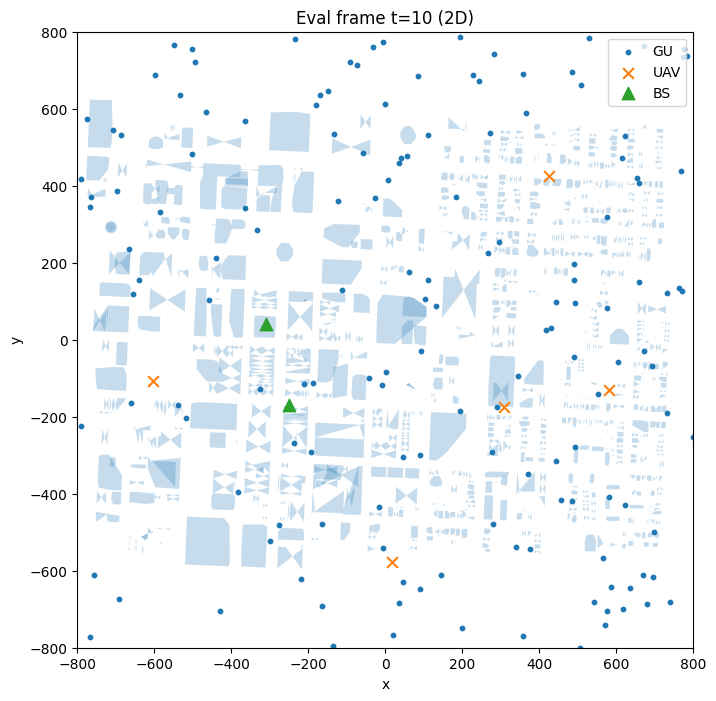

[scene] cfg_path = /data/jhuang52/Projects/metaRL_merged/inner_loop/model_a/configs/raleigh_modelA.json
[scene] scene_xml = /data/jhuang52/Projects/metaRL_merged/scenarios/raleigh_scene/raleigh_union_square.xml
[scene] buildings.boxes_json = /data/jhuang52/Projects/metaRL_merged/scenarios/raleigh_buildings.json


In [5]:
t = 10
gu_xyz = cache["gu_xyz"][t]
uav_xyz = cache["uav_xyz"][t]

# 2D
visualize_scene_2d(CFG_PATH, gu_xyz=gu_xyz, uav_xyz=uav_xyz, title=f"Eval frame t={t} (2D)")

# 3D
fig = visualize_scene_3d(CFG_PATH, gu_xyz=gu_xyz, uav_xyz=uav_xyz, title=f"Eval frame t={t} (3D)")
fig
